# Project Part 3 - DATA 602
Reynald Oliveria

## Importing Packages

In [27]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Generating mean statistics on pre-tournament games per team per season

In [28]:
m_reg_df = pd.read_csv('./data/MRegularSeasonDetailedResults.csv')
m_reg_df_w = m_reg_df[np.hstack([['Season'], m_reg_df.columns[m_reg_df.columns.str.startswith('W')]])]
m_reg_df_w.columns = np.hstack([['Season'], m_reg_df.columns[m_reg_df.columns.str.startswith('W')].str[1:]])
m_reg_df_l = m_reg_df[np.hstack([['Season'], m_reg_df.columns[m_reg_df.columns.str.startswith('L')]])]
m_reg_df_l.columns = np.hstack([['Season'], m_reg_df.columns[m_reg_df.columns.str.startswith('L')].str[1:]])
m_reg_df = pd.concat([m_reg_df_w, m_reg_df_l], axis = 0, ignore_index = True).drop(columns = 'Loc')
means_df = m_reg_df.groupby(['Season', 'TeamID']).mean().reset_index()
means_df = means_df.rename(columns = {'Score' : 'ScoreRegSzn'})
means_df

,Season,TeamID,ScoreRegSzn,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1102,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000
1,2003,1103,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852
2,2003,1104,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714
3,2003,1105,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769
4,2003,1106,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,2024,1474,77.322581,26.967742,62.516129,8.419355,25.516129,14.967742,21.064516,8.645161,23.580645,12.258065,11.193548,6.645161,2.709677,17.451613
7613,2024,1475,66.931034,22.379310,56.206897,6.448276,20.379310,15.724138,21.137931,8.482759,24.206897,10.862069,12.827586,6.137931,2.758621,21.620690
7614,2024,1476,63.200000,22.933333,57.933333,8.200000,27.200000,9.133333,13.100000,6.866667,23.066667,11.866667,12.966667,6.266667,2.366667,15.466667
7615,2024,1477,67.266667,23.300000,59.400000,8.033333,27.333333,12.633333,18.266667,7.500000,20.333333,12.266667,11.000000,7.366667,4.566667,17.666667


## Gathering pre-tournament seeds and attaching to other pre-tournament statistics

In [29]:
seeds_df = pd.read_csv('./data/MNCAATourneySeeds.csv')
seeds_df['Seed'] = seeds_df['Seed'].str[1:3].astype(int)

means_df = means_df.merge(seeds_df, how = 'left')
means_df

,Season,TeamID,ScoreRegSzn,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Seed
0,2003,1102,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,NaN
1,2003,1103,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,NaN
2,2003,1104,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,10.0
3,2003,1105,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,NaN
4,2003,1106,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,2024,1474,77.322581,26.967742,62.516129,8.419355,25.516129,14.967742,21.064516,8.645161,23.580645,12.258065,11.193548,6.645161,2.709677,17.451613,NaN
7613,2024,1475,66.931034,22.379310,56.206897,6.448276,20.379310,15.724138,21.137931,8.482759,24.206897,10.862069,12.827586,6.137931,2.758621,21.620690,NaN
7614,2024,1476,63.200000,22.933333,57.933333,8.200000,27.200000,9.133333,13.100000,6.866667,23.066667,11.866667,12.966667,6.266667,2.366667,15.466667,NaN
7615,2024,1477,67.266667,23.300000,59.400000,8.033333,27.333333,12.633333,18.266667,7.500000,20.333333,12.266667,11.000000,7.366667,4.566667,17.666667,NaN


## Gathering tournament results and randomly flipping Team0 and Team1 to generate balanced labels

In [30]:
m_tourney_df = pd.read_csv('./data/MNCAATourneyCompactResults.csv')

m_tourney_df = m_tourney_df[['Season', 'WTeamID', 'WScore' ,'LTeamID', 'LScore']]
m_tourney_df['ScoreDiff'] = m_tourney_df['WScore'] - m_tourney_df['LScore']
m_tourney_df['Winner'] = 0
m_tourney_df = m_tourney_df[['Season', 'WTeamID', 'LTeamID', 'ScoreDiff', 'Winner']]
m_tourney_2024_df = pd.read_csv('./data/2024_tourney_results.csv')
m_team_names = pd.read_csv('./data/MTeamSpellings.csv', encoding='cp1252')
m_tourney_2024_df[['Team1', 'Team2']] = m_tourney_2024_df[['Team1', 'Team2']].apply(lambda col: col.str.lower(), axis = 1)
m_tourney_2024_df['TeamID0'] = m_tourney_2024_df.merge(m_team_names, left_on='Team1', right_on='TeamNameSpelling')['TeamID']
m_tourney_2024_df['TeamID1'] = m_tourney_2024_df.merge(m_team_names, left_on='Team2', right_on='TeamNameSpelling')['TeamID']
m_tourney_2024_df['WTeamID'] = np.where(m_tourney_2024_df['Score1'] > m_tourney_2024_df['Score2'], m_tourney_2024_df['TeamID0'], m_tourney_2024_df['TeamID1'])
m_tourney_2024_df['LTeamID'] = np.where(m_tourney_2024_df['Score1'] < m_tourney_2024_df['Score2'], m_tourney_2024_df['TeamID0'], m_tourney_2024_df['TeamID1'])
m_tourney_2024_df['ScoreDiff'] = np.abs(m_tourney_2024_df['Score1'] - m_tourney_2024_df['Score2'])
m_tourney_2024_df['Winner'] = 0
m_tourney_2024_df = m_tourney_2024_df[['Season', 'WTeamID', 'LTeamID', 'ScoreDiff', 'Winner']]
m_tourney_df = pd.concat([m_tourney_df, m_tourney_2024_df], axis = 0, ignore_index = True)

m_tourney_df.columns = ['Season', 'TeamID0', 'TeamID1', 'ScoreDiff', 'Winner']
flip = m_tourney_df.sample(n = int(len(m_tourney_df)/2), random_state = 42).index
m_tourney_df.loc[flip, ['TeamID0', 'TeamID1']] = m_tourney_df.loc[flip, ['TeamID1', 'TeamID0']].values
m_tourney_df.loc[flip, 'ScoreDiff'] = -m_tourney_df.loc[flip, 'ScoreDiff']
m_tourney_df.loc[flip, 'Winner'] = 1
m_tourney_df

,Season,TeamID0,TeamID1,ScoreDiff,Winner
0,1985,1116,1234,9,0
1,1985,1120,1345,1,0
2,1985,1250,1207,-25,1
3,1985,1229,1425,3,0
4,1985,1242,1325,11,0
...,...,...,...,...,...
2513,2024,1166,1397,-7,1
2514,2024,1345,1397,6,0
2515,2024,1104,1163,-14,1
2516,2024,1301,1345,-13,1


## Taking difference in pretournament statistics and enriching with tournament results

In [31]:
means_df.columns = means_df.columns + '0'
means_df = means_df.rename(columns = {'Season0': 'Season'})
enriched_df = pd.merge(m_tourney_df, means_df, on = ['Season', 'TeamID0'], how = 'inner').rename(columns = {'TeamID0': 'TeamID0_'})
means_df.columns = means_df.columns.str[:-1] + '1'
means_df = means_df.rename(columns = {'Seaso1': 'Season'})
enriched_df = pd.merge(enriched_df, means_df, on = ['Season', 'TeamID1'], how = 'inner').rename(columns = {'TeamID1': 'TeamID1_'})

diff_cols = enriched_df.columns[enriched_df.columns.str.endswith('0')].str[:-1] + "Diff"
enriched_df[diff_cols] = enriched_df[enriched_df.columns[enriched_df.columns.str.endswith('0')]].values - \
                         enriched_df[enriched_df.columns[enriched_df.columns.str.endswith('1')]].values
enriched_df = enriched_df.drop(columns = enriched_df.columns[enriched_df.columns.str.endswith('0')])\
                         .drop(columns = enriched_df.columns[enriched_df.columns.str.endswith('1')])

enriched_df.to_csv('enriched_data.csv', index = False)
enriched_df = enriched_df.drop(columns = ['TeamID0_', 'TeamID1_'])
enriched_df

,Season,ScoreDiff,Winner,ScoreRegSznDiff,FGMDiff,FGADiff,FGM3Diff,FGA3Diff,FTMDiff,FTADiff,ORDiff,DRDiff,AstDiff,TODiff,StlDiff,BlkDiff,PFDiff,SeedDiff
0,2003,8,0,-1.593103,-0.354023,1.526437,0.549425,-0.500000,-1.434483,-7.135632,-0.890805,-1.627586,-1.165517,0.973563,0.635632,0.766667,0.803448,0.0
1,2003,-29,1,-17.421182,-5.493842,-9.852217,-1.759852,-4.588670,-4.673645,-5.448276,-2.213054,-1.918719,-3.435961,-0.716749,-1.602217,-1.248768,-1.853448,15.0
2,2003,13,0,1.448276,0.931034,-3.103448,-3.000000,-7.482759,2.586207,3.310345,-0.379310,-2.655172,-1.068966,0.206897,-2.172414,-0.827586,0.655172,3.0
3,2003,6,0,0.102403,-2.076280,-4.764890,-1.142111,-2.553814,5.397074,5.142111,-0.292581,0.094044,-1.197492,4.877743,-1.290491,-0.454545,3.692790,5.0
4,2003,2,0,2.082759,3.011494,5.390805,-1.552874,-5.465517,-2.387356,-0.949425,1.508046,2.345977,1.333333,-0.027586,-1.214943,-0.273563,-1.563218,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,-7,1,1.062500,1.781250,-1.687500,1.875000,3.843750,-4.375000,-6.468750,-3.625000,2.937500,0.375000,-0.156250,-3.968750,-0.531250,-6.125000,1.0
1378,2024,6,0,3.925189,1.077652,-3.356061,-0.385417,-5.075758,2.155303,3.812500,0.280303,1.322917,1.643939,1.000947,-2.270833,-0.868371,-3.073864,-1.0
1379,2024,-14,1,9.279412,1.818015,6.102941,2.268382,6.310662,3.375000,3.283088,0.943015,-0.082721,-2.623162,2.694853,1.014706,-1.319853,3.639706,3.0
1380,2024,-13,1,-7.032828,-1.126263,2.578283,-1.277778,-0.035354,-3.502525,-5.194444,-1.974747,-3.083333,-5.699495,-1.747475,1.750000,-0.287879,1.997475,10.0


## Creating test dataset to be the latest tournament year

In [32]:
df_train = enriched_df[enriched_df['Season'] < 2024]
df_test = enriched_df[enriched_df['Season'] == 2024]

X_train = df_train.drop(columns = ['Season', 'ScoreDiff', 'Winner'])
X_test = df_test.drop(columns = ['Season', 'ScoreDiff', 'Winner'])

y_train = df_train['Winner']
y_test = df_test['Winner']

## Classifiying with a Random Forest

### Testing Report

In [33]:
rf = RandomForestClassifier(random_state=42, n_estimators = 1000)

rf.fit(X_train, y_train.values.ravel())
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        35
           1       0.72      0.72      0.72        32

    accuracy                           0.73        67
   macro avg       0.73      0.73      0.73        67
weighted avg       0.73      0.73      0.73        67



### Training Report

In [34]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       1.00      1.00      1.00       655

    accuracy                           1.00      1315
   macro avg       1.00      1.00      1.00      1315
weighted avg       1.00      1.00      1.00      1315



### Feature importances

In [35]:
imp_df = pd.DataFrame(columns = ['Importance'], index = X_train.columns)
imp_df.loc[:, 'Importance'] = rf.feature_importances_
imp_df.sort_values(by = 'Importance', ascending = False)

,Importance
SeedDiff,0.165411
FGMDiff,0.070064
BlkDiff,0.069961
TODiff,0.0688
PFDiff,0.067702
AstDiff,0.064504
StlDiff,0.063181
ORDiff,0.059625
ScoreRegSznDiff,0.059244
DRDiff,0.054354


## Classifying with a Logistic Regression

### Testing Report

In [36]:
lr = LogisticRegression(random_state = 42, penalty = 'l1', solver = 'liblinear')

lr.fit(X_train / np.std(X_train, 0), y_train.values.ravel())
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        35
           1       0.65      0.75      0.70        32

    accuracy                           0.69        67
   macro avg       0.69      0.69      0.69        67
weighted avg       0.69      0.69      0.69        67



### Training Report

In [37]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       660
           1       0.70      0.70      0.70       655

    accuracy                           0.70      1315
   macro avg       0.70      0.70      0.70      1315
weighted avg       0.70      0.70      0.70      1315



### Feature Importances

In [38]:
imp_df = pd.DataFrame(columns = ['Importance'], index = X_train.columns)
imp_df.loc[:, 'Importance'] = np.abs(lr.coef_)
imp_df = imp_df.sort_values(by = 'Importance', ascending = True)

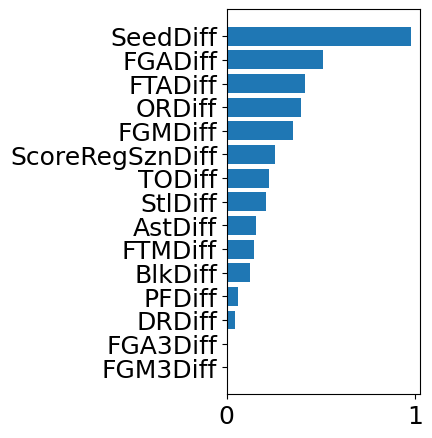

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize = (2.5,5))
plt.barh(imp_df.index, imp_df['Importance'])
plt.rcParams['font.size'] = 18
plt.show()

## Conclusions

We see that Random Forests seem to outperform the Logistic both in the training set and the testing set. We expect that random forests to score very highly on the training data by the nature of the algorithm, so there is not much information we can draw from that.

We see however that the Logistic Regression with the $L_1$ penalty have similar training metrics as testing metrics. This suggests that there is not much overfitting going on.

Regardless, the difference in the metrics on the test set are not particulary large between the two, so there is not a conclusion on which methods are better.

But we see that they have different feature importances, and in particular, the seeds are the most important feature for both methods. Because seed is bounded, and uniformly distributed, this suggests it is not linear. Further, there are features that are derived from other features, like "ScoreRegSzn" can be derived from "FGM" and "FGM3." More feature selection and hyperparameter tuning would help both of these methods.